In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df.drop('medv', axis=1).values
y = df['medv'].values
feature_names = df.drop('medv', axis=1).columns.tolist()

In [67]:
# Convert to pandas DataFrame for easier manipulation
boston_df = pd.DataFrame(X, columns=feature_names)
boston_df['PRICE'] = y

# Print the actual column names to confirm
print("Actual column names in the dataset:", boston_df.columns.tolist())

Actual column names in the dataset: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'PRICE']


In [9]:
# Display basic information about the dataset
print("Dataset shape:", boston_df.shape)
print("\nFeatures:")
for name in feature_names:
    print(f"- {name}")
print("\nFirst few rows of the dataset:")
boston_df.head()

Dataset shape: (506, 14)

Features:
- crim
- zn
- indus
- chas
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- b
- lstat

First few rows of the dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# Basic statistics of the dataset
print("\nDataset statistics:")
boston_df.describe()


Dataset statistics:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


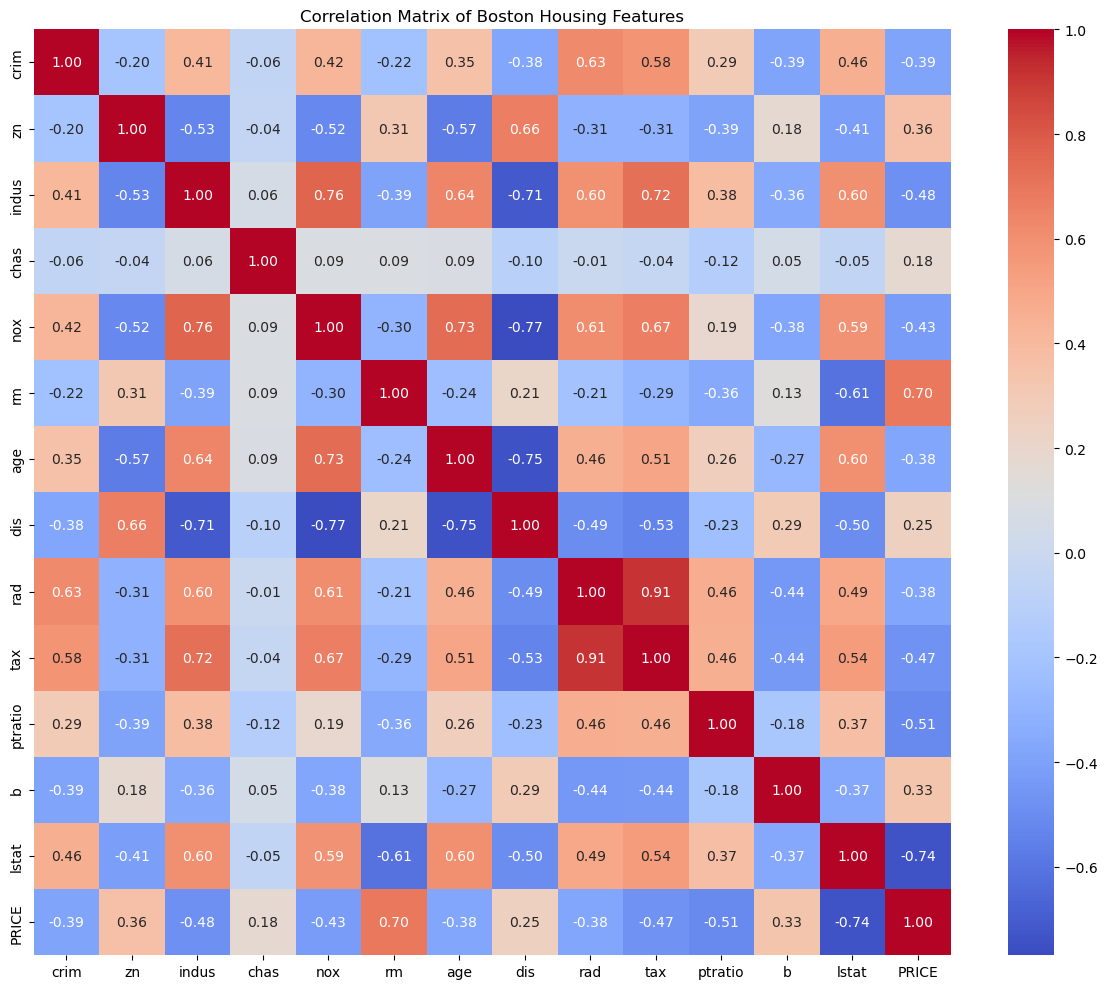

In [13]:
# Visualize the correlation between features
plt.figure(figsize=(12, 10))
correlation_matrix = boston_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Boston Housing Features')
plt.tight_layout()
plt.show()

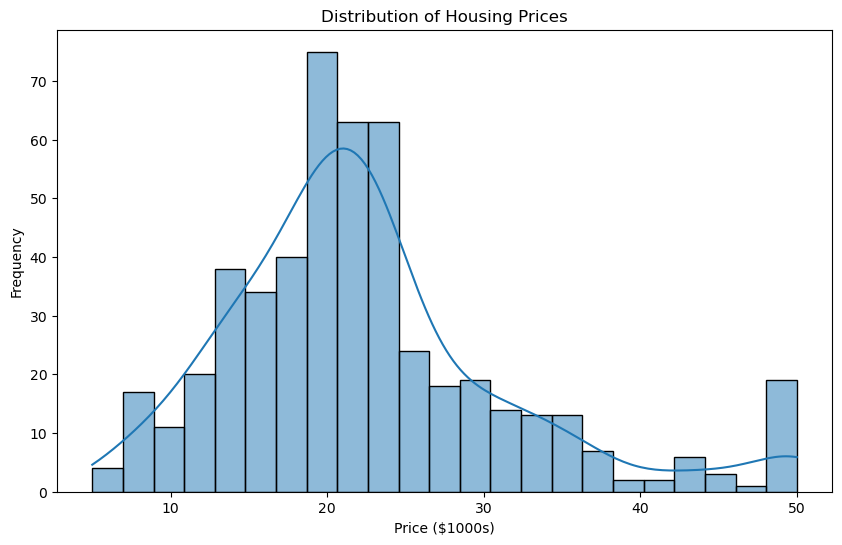

In [15]:
# Visualize the target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PRICE'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price ($1000s)')
plt.ylabel('Frequency')
plt.show()


Checking if important features exist in the DataFrame:
- RM: Not available
- LSTAT: Not available
- PTRATIO: Not available
- INDUS: Not available

Not all expected features are available. Using the first few available features instead.
Features used for visualization: Index(['crim', 'zn', 'indus', 'chas'], dtype='object')


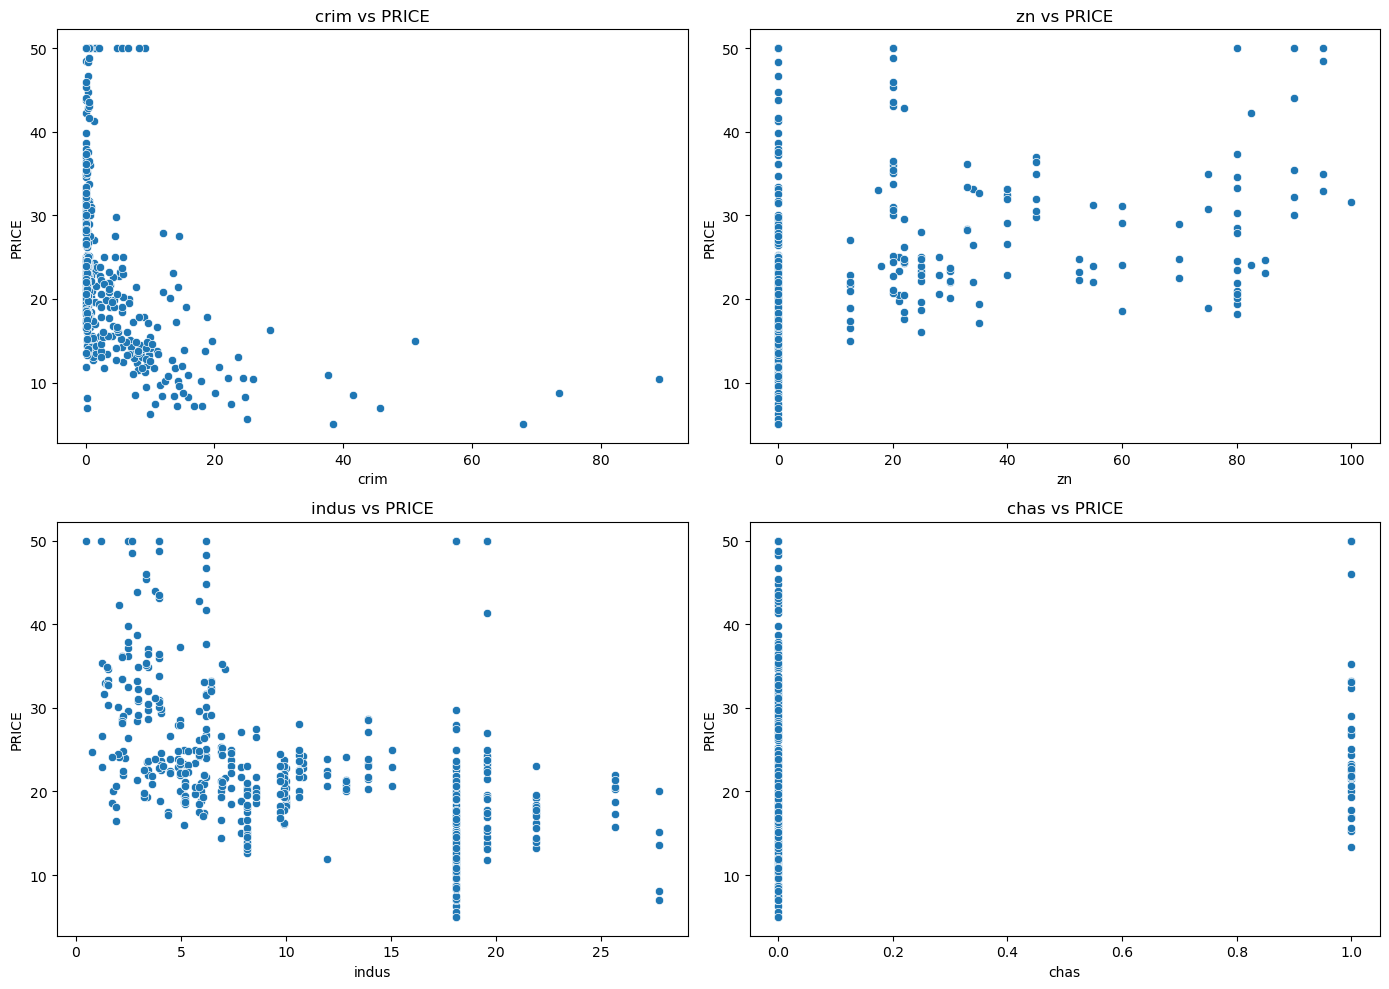

In [23]:
# Explicitly check if these features exist in the DataFrame
print("\nChecking if important features exist in the DataFrame:")
expected_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS']
available_features = []

for feature in expected_features:
    if feature in boston_df.columns:
        print(f"- {feature}: Available")
        available_features.append(feature)
    else:
        print(f"- {feature}: Not available")

# If any feature is not available, use the first few available features instead
if len(available_features) < 4:
    print("\nNot all expected features are available. Using the first few available features instead.")
    important_features = boston_df.columns[:4] if len(boston_df.columns) >= 5 else boston_df.columns[:-1]
else:
    important_features = available_features

print(f"Features used for visualization: {important_features}")

# Visualize relationship between important features and target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    if i < len(axes):  # Make sure we don't go out of bounds
        sns.scatterplot(x=boston_df[feature], y=boston_df['PRICE'], ax=axes[i])
        axes[i].set_title(f'{feature} vs PRICE')

plt.tight_layout()
plt.show()

In [25]:
# Prepare the data for modeling
X = boston_df.drop('PRICE', axis=1).values
y = boston_df['PRICE'].values

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Create a deep neural network model for regression
def build_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # No activation for regression output
    ])
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',  # Mean Squared Error loss for regression
        metrics=['mae']  # Mean Absolute Error as a metric
    )
    
    return model

In [33]:
# Build the model
input_dim = X_train_scaled.shape[1]
model = build_model(input_dim)

In [35]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

In [41]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=60,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.0218 - mae: 3.3737 - val_loss: 13.0722 - val_mae: 2.5333
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 26.1102 - mae: 3.2746 - val_loss: 13.9596 - val_mae: 2.6247
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.1031 - mae: 2.8790 - val_loss: 14.2763 - val_mae: 2.5951
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.6305 - mae: 3.4858 - val_loss: 14.8107 - val_mae: 2.6655
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.7770 - mae: 3.2979 - val_loss: 14.2630 - val_mae: 2.6195
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.5741 - mae: 3.3991 - val_loss: 13.7973 - val_mae: 2.6087
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.2457 - mae: 3.2692 - val_loss: 14.2847 - val_mae: 2.6523
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.1300 - mae: 2.9905 - val_loss: 13.7661 - val_mae: 2.5473
Epoch 9/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

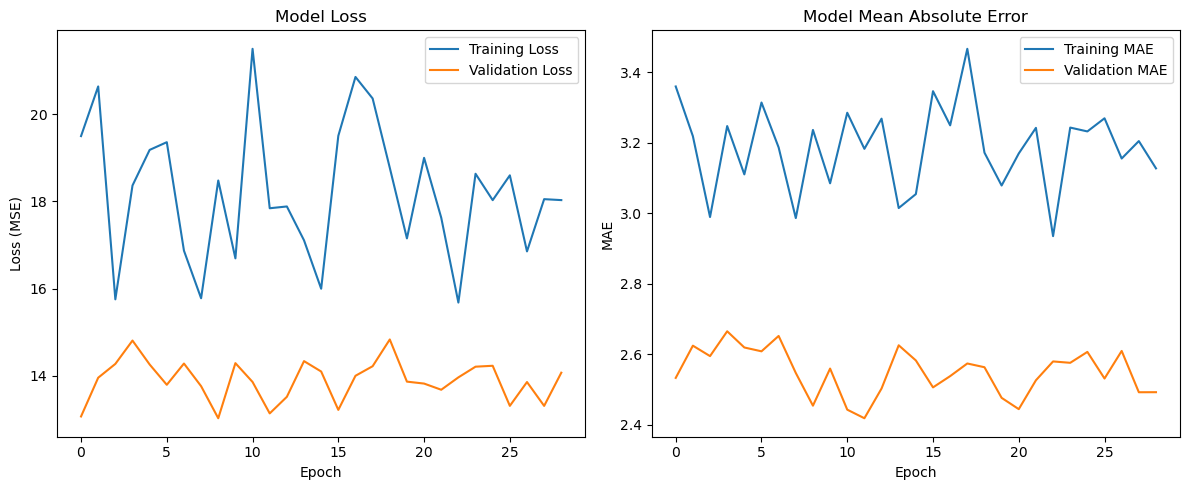

In [43]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [47]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse:.4f}")
print(f"Test Root Mean Squared Error: {rmse:.4f}")
print(f"Test R² Score: {r2:.4f}")

Test Mean Squared Error: 13.2083
Test Root Mean Squared Error: 3.6343
Test R² Score: 0.8199


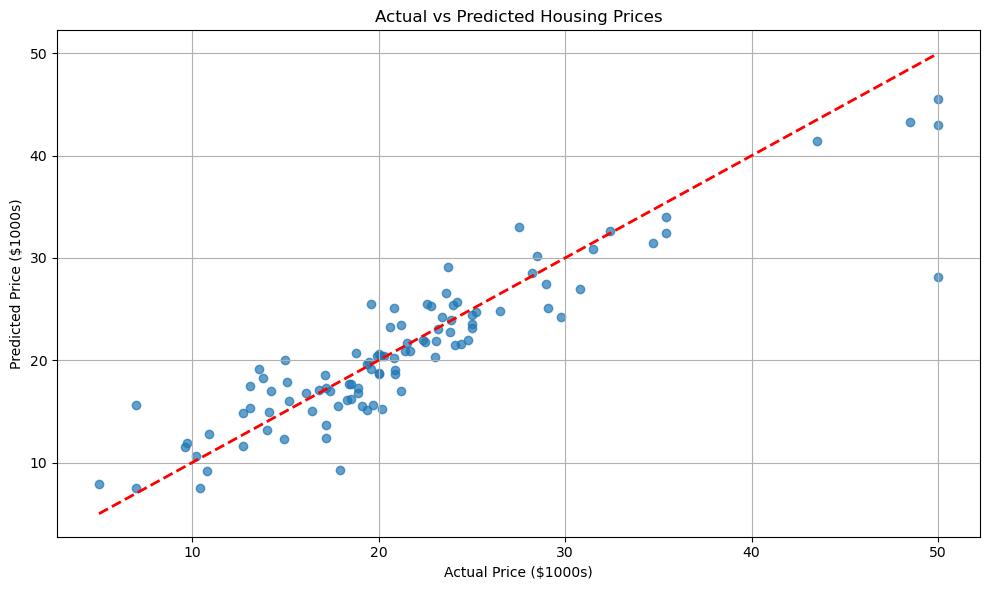

In [49]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

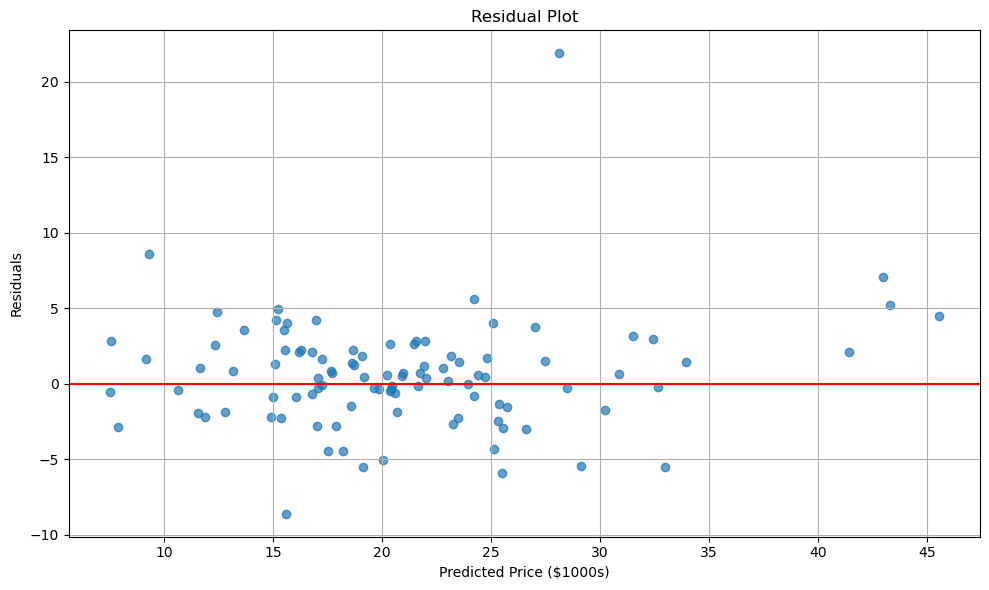

In [51]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Price ($1000s)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
# Feature importance analysis
# Train a simple model with standardized features
simple_model = Sequential([
    Dense(1, input_dim=input_dim, use_bias=False)  # Linear model with no bias
])

simple_model.compile(optimizer='adam', loss='mse')
simple_model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

# Extract the weights
weights = simple_model.get_weights()[0].flatten()

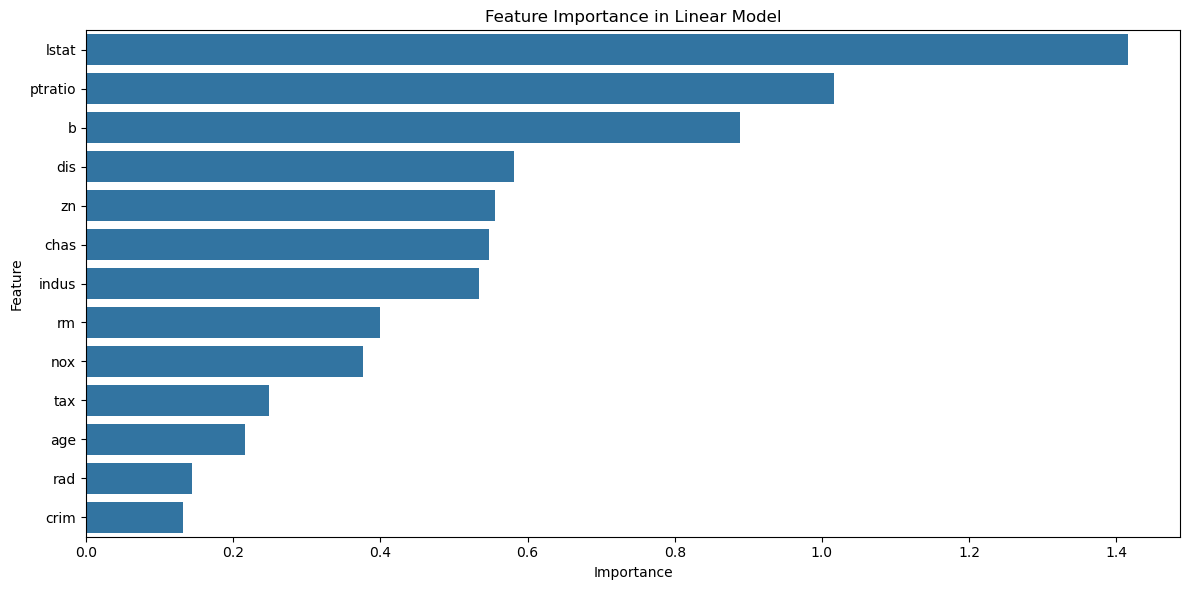

In [59]:
# Create a DataFrame to visualize feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(weights)
})

feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Linear Model')
plt.tight_layout()
plt.show()

In [61]:
print("Top 5 most important features:")
print(feature_importance.head(5))

Top 5 most important features:
    Feature  Importance
12    lstat    1.415729
10  ptratio    1.016749
11        b    0.889342
7       dis    0.581141
1        zn    0.556418


In [63]:
# Save the model
model.save('boston_housing_dnn_model.h5')
print("\nModel saved as 'boston_housing_dnn_model.h5'")


Model saved as 'boston_housing_dnn_model.h5'


In [65]:
# Function to make predictions on new data
def predict_price(new_data, scaler, model):
    """
    Make predictions on new housing data
    
    Parameters:
    new_data (numpy array): Housing features in the same order as the training data
    scaler (StandardScaler): The fitted scaler used on training data
    model (keras.Model): The trained model
    
    Returns:
    float: Predicted housing price in $1000s
    """
    # Scale the new data
    new_data_scaled = scaler.transform(new_data.reshape(1, -1))
    
    # Make prediction
    prediction = model.predict(new_data_scaled).flatten()[0]
    
    return prediction

# Example of using the prediction function with a sample house
# (This would be actual data in a real-world scenario)
sample_house = X_test[0]
actual_price = y_test[0]
predicted_price = predict_price(sample_house, scaler, model)

print("\nExample prediction:")
print(f"Actual price: ${actual_price * 1000:.2f}")
print(f"Predicted price: ${predicted_price * 1000:.2f}")
print(f"Difference: ${(actual_price - predicted_price) * 1000:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Example prediction:
Actual price: $23600.00
Predicted price: $27027.20
Difference: $-3427.20
